<a href="https://colab.research.google.com/github/dguevaraapaza/Micobiome-Project/blob/main/Project_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
!pip install -q requests
!pip install -q beautifulsoup4
!pip install -q wget

  Preparing metadata (setup.py) ... done


In [ ]:
# Install qime2
!wget -q -O setup_qiime2 https://raw.githubusercontent.com/Gibbons-Lab/isb_course_2024/refs/heads/main/setup_qiime2

In [ ]:
%run setup_qiime2

[17:19:51] 🐍 Downloading miniforge...                                                              ]8;id=983675;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=825423;file:///content/setup_qiime2#67\67]8;;\

[17:19:53] 🐍 Done.                                                                                 ]8;id=635692;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=128095;file:///content/setup_qiime2#73\73]8;;\

           🐍 Installing miniforge...                                                               ]8;id=423969;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=118405;file:///content/setup_qiime2#67\67]8;;\

[17:20:07] 🐍 Installed miniforge to `/usr/local`.                                                  ]8;id=945321;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=345519;file:///content/setup_qiime2#73\73]8;;\

           🔍 Downloading Qiime 2 package list...                                                   ]8;id=908950;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=654203;file:///content/setup_qiime2#67\67]8;;\

           🔍 Done.                                                                                 ]8;id=726144;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=789461;file:///content/setup_qiime2#73\73]8;;\

           🔍 Installing Qiime 2. This may take a little bit.                                       ]8;id=657669;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=78462;file:///content/setup_qiime2#67\67]8;;\
            🕐                                                                                                     

[17:25:26] 🔍 Done.                                                                                 ]8;id=601004;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=840030;file:///content/setup_qiime2#73\73]8;;\

           🌲 Installing Empress...                                                                 ]8;id=172098;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=825918;file:///content/setup_qiime2#67\67]8;;\

[17:25:30] 🌲 Done.                                                                                 ]8;id=141417;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=394326;file:///content/setup_qiime2#73\73]8;;\

           📊 Checking that Qiime 2 command line works...                                           ]8;id=840157;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=743858;file:///content/setup_qiime2#67\67]8;;\

[17:25:44] 📊 Qiime 2 command line looks good 🎉                                                    ]8;id=407788;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=800087;file:///content/setup_qiime2#73\73]8;;\

           🧹 Cleaned up unneeded files.                                                            ]8;id=561345;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=844593;file:///content/setup_qiime2#62\62]8;;\

           Everything is A-OK. You can start using Qiime 2 now 👍                                  ]8;id=208130;file:///content/setup_qiime2\setup_qiime2]8;;\:]8;id=426156;file:///content/setup_qiime2#149\149]8;;\

In [ ]:
import requests
from bs4 import BeautifulSoup
import wget
import os
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
# URL of the page with the .fastq.gz files
url = 'https://ibdmdb.org/downloads/html/rawfiles_16s_2018-01-08.html'

# Send a GET request to fetch the page content
response = requests.get(url)
response.raise_for_status()  # Check for successful request

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Create a directory to save downloaded files
os.makedirs("fastq_files", exist_ok=True)

# Find all links to .fastq.gz files and download them
for link in soup.find_all('a', href=True):
    file_url = link['href']
    if file_url.endswith('.fastq.gz'):
        # Full URL of the file
        print(f"Downloading {file_url}")
        # Download and save the file
        wget.download(file_url, out='fastq_files')

print("Download complete.")

In [ ]:
# from google.colab import files
# import shutil

# # Compress the folder into a zip file
# shutil.make_archive('fastq_files', 'zip', 'fastq_files')

# # Download the zip file
# files.download('fastq_files.zip')

In [ ]:
# create manifest
import os
import pandas as pd

# Directory containing the downloaded fastq files
directory = 'fastq_files'

# Prepare data for the manifest
data = []
for filename in os.listdir(directory):
    if filename.endswith('.fastq.gz'):
        sample_id = filename.split('.')[0]  # Extract sample ID from filename
        absolute_path = os.path.join('$PWD', directory, filename)  # Create absolute path with $PWD
        data.append({'sample-id': sample_id, 'absolute-filepath': absolute_path})

# Create a DataFrame
manifest_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
manifest_df.to_csv('manifest.tsv',sep='\t', index=None)

# Show the manifest DataFrame
manifest_df

In [ ]:
import pandas as pd
import numpy as np
# create metadata
!wget -q -O hmp2_metadata_2018-08-20.csv https://g-227ca.190ebd.75bc.data.globus.org/ibdmdb/metadata/hmp2_metadata_2018-08-20.csv
#os.rename('downloaded_file.csv', 'hmp2_metadata_2018-08-20.csv')

metadata = pd.read_csv('hmp2_metadata_2018-08-20.csv')
metadata.head()

<ipython-input-26-97d52721dabb>:7: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('hmp2_metadata_2018-08-20.csv')


,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check integrity per data type (collection)
gb = metadata.groupby('data_type')
print(metadata.data_type.unique())
metad = [gb.get_group(x) for x in gb.groups]
print('------------------------------------')
print(metadata['data_type'].value_counts())

['biopsy_16S' 'host_genome' 'host_transcriptomics' 'metabolomics'
 'metagenomics' 'metatranscriptomics' 'methylome' 'proteomics' 'serology'
 'stool_16S' 'viromics']
------------------------------------
data_type
metagenomics            1638
metatranscriptomics      835
viromics                 703
metabolomics             546
proteomics               450
methylome                449
host_transcriptomics     252
serology                 210
stool_16S                180
biopsy_16S               178
host_genome               92
Name: count, dtype: int64


In [ ]:
# biopsy_16S
biopsy_16S = metad[0]
biopsy_16S.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,date_of_receipt,interval_days,visit_num,Research Project,...,FecalCal received at MGH:,Proteomics received at LBNL:,Stool Sample ID: Tube A (EtOH),Sample ID: Tube B (No preservative),Tube A and B received at Broad:,stool_id,smoking status,Number years smoked,Age when started smoking,How many cigarettes/cigars/etc. do you smoke per day?
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,NaN,NaN,1,ibdmdb,...,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [ ]:
# trimming empty cols
temp = biopsy_16S.isna().sum().to_frame('missing_values').reset_index().rename(columns={'index':'cols'})
remove = temp.loc[temp['missing_values']>=100]
remove = remove.cols.tolist()

# split and remove
biopsy_16S = biopsy_16S.drop(columns=remove)
biopsy_16S.head()

,Project,External ID,Participant ID,site_sub_coll,data_type,week_num,visit_num,Research Project,IntervalName,IntervalSequence,...,Left Colon.3,Rectum.3,Total.3,SES-CD Score,Partial Endoscopy.1,sex,Viromics received at Baylor:,FecalCal received at MGH:,Proteomics received at LBNL:,Tube A and B received at Broad:
0,C3001CSC1_BP,206615,C3001,C3001CSC1,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
1,C3001CSC2_BP,206614,C3001,C3001CSC2,biopsy_16S,2.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
2,C3002CSC1_BP,206617,C3002,C3002CSC1,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
3,C3002CSC2_BP,206619,C3002,C3002CSC2,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No
4,C3002CSC3_BP,206616,C3002,C3002CSC3,biopsy_16S,0.0,1,ibdmdb,Screening Colonoscopy,1,...,No narrowings,No narrowings,0.0,0.0,No,Female,No,No,No,No


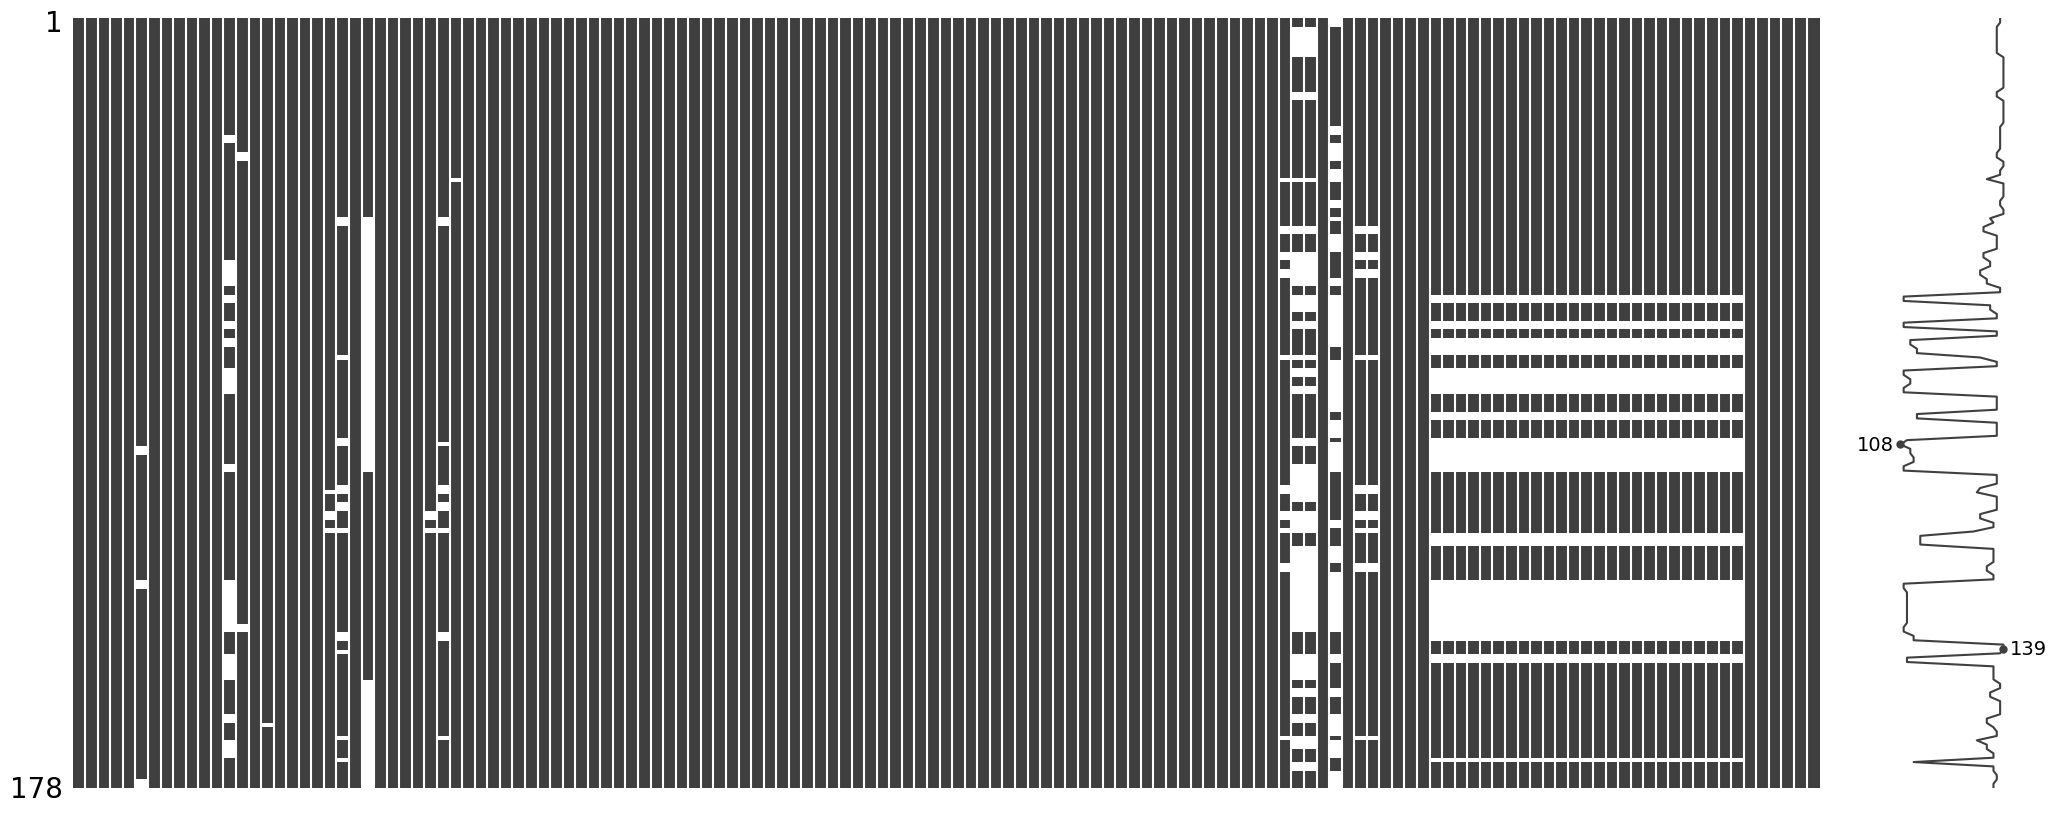

In [ ]:
msno.matrix(biopsy_16S)
plt.show()

In [ ]:
# 1. Metagenomics
metadata.loc(metadata['data_type'].isin(['metagenomics']))

TypeError: unhashable type: 'Series'

In [ ]:
(metadata.dtypes.index.tolist())

['Project',
 'External ID',
 'Participant ID',
 'site_sub_coll',
 'data_type',
 'week_num',
 'date_of_receipt',
 'interval_days',
 'visit_num',
 'Research Project',
 'PDO Number',
 'GSSR IDs',
 'Product',
 'LCSET',
 'Aggregated Lanes',
 'WR ID',
 '# Lanes in Aggregation',
 'reads_raw',
 'reads_filtered',
 'reads_qc_fail',
 'reads_human',
 'reads_ribosomal',
 'reads_viral',
 'Delta',
 'IntervalName',
 'IntervalSequence',
 'ProjectSpecificID',
 'site_name',
 'Age at diagnosis',
 'Has the subject had a cholecystectomy?',
 'Has the subject had a prior abdominal surgery (other)?',
 'Has the next visit been scheduled?',
 'Has the subject been given new stool kits?',
 'Has the subject completed the FFQ/YAQ?',
 'Education Level',
 'Occupation',
 'Scanned FFQ/YAQ document:',
 'FFQ/YAQ results:',
 'Has the subject had an appendectomy?',
 'Has the subject had a tonsillectomy?',
 'biopsy_location',
 'Were study bloods drawn?',
 'Whole blood received at Broad:',
 'Serum tube #1 received at CSMC:',


In [ ]:
# turn FASTQ files containing our data into QIIME artifacts
!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-path manifest.tsv \
  --output-path sequences.qza \
  --input-format SingleEndFastqManifestPhred33V2

Imported manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


In [ ]:
# QIIME to visualize our sequencing data.
!qiime demux summarize \
--i-data sequences.qza \
--o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


In [ ]:
# Quality Filtering: From Sequence to ASV
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 150 \
    --p-n-threads 2 \
    --output-dir dada --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/qiime2/root/data/61c306c7-0fdd-4ef8-9866-1948640a37db/data --output_path /tmp/tmp2y15him5/output.tsv.biom --output_track /tmp/tmp2y15him5/track.tsv --filtered_directory /tmp/tmp2y15him5 --truncation_length 150 --trim_left 0 --max_expected_errors 2.0 --truncation_quality_score 2 --max_length Inf --pooling_method independent --chimera_method consensus --min_parental_fold 1.0 --allow_one_off False --num_threads 2 --learn_min_reads 1000000 --homopolymer_gap_penalty NULL --band_size 16

Warning message:
package ‘optparse’ was built under R version 4.2.3 
R version 4.2.2 (2022-10-31) 
Loading required package: Rcpp
DADA2: 1.26.0 / Rcpp: 1.0.11 / RcppParallel: 5.1.6 
2) Filtering 


......................................

In [ ]:
!qiime metadata tabulate \
    --m-input-file dada/denoising_stats.qza \
    --o-visualization dada/denoising-stats.qzv

Saved Visualization to: dada/denoising-stats.qzv


## Phyllogenetics

In [ ]:
!qiime phylogeny align-to-tree-mafft-fasttree \
    --i-sequences dada/representative_sequences.qza \
    --output-dir tree

Saved FeatureData[AlignedSequence] to: tree/alignment.qza
Saved FeatureData[AlignedSequence] to: tree/masked_alignment.qza
Saved Phylogeny[Unrooted] to: tree/tree.qza
Saved Phylogeny[Rooted] to: tree/rooted_tree.qza


In [ ]:
!qiime empress tree-plot \
    --i-tree tree/rooted_tree.qza \
    --o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


## Diversity

In [ ]:
!qiime diversity core-metrics-phylogenetic \
    --i-table dada/table.qza \
    --i-phylogeny tree/rooted_tree.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file metadata.tsv \
    --output-dir diversity

There was an issue with loading the file metadata.tsv as metadata:

  Metadata file path doesn't exist, or the path points to something other than a file. Please check that the path exists, has read permissions, and points to a regular file (not a directory): metadata.tsv

  There may be more errors present in the metadata file. To get a full report, sample/feature metadata files can be validated with Keemei: https://keemei.qiime2.org

  Find details on QIIME 2 metadata requirements here: https://docs.qiime2.org/2023.9/tutorials/metadata/



In [ ]:
# from google.colab import files
# import shutil

# # # Zip the directory
# # shutil.make_archive('./content', 'zip', './content')

# # Download the zipped file
# files.download('./content.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>